In [2]:
#! usr/bin/env python3
from textblob import TextBlob
import praw
import pandas as pd
import datetime as dt
from praw.models import MoreComments
from collections import defaultdict
import matplotlib.pyplot as plt


import numpy as np

reddit = praw.Reddit(client_id='Rm8fs6qcu-bSMw', \
                     client_secret='QZ7kz1LQpzmQUyJwn2F8lGGW_bc', \
                     user_agent='leagueScraper', \
                     username='lemonwater123', \
                     password='1flipple2')

subreddit = reddit.subreddit('leagueoflegends')
top_subreddit = subreddit.top(limit=10)
player_list = []
polarity_averages = []
emotion_list = []
topics_dict = { "title":[], \
            "created": [], \
            "id":[], \
          }
comments_dict = { "title":[], \
             "comment":[], \
              "score":[], \
             "polarity":[], \
             "subjectivity":[], \
             "emotion":[]
            }
def get_date(created): # function to convert date
    return dt.datetime.fromtimestamp(created)
def get_player_data(player, team):
    player_list.append(player)
    player_comments= {
        
    }

    for submission in reddit.subreddit('leagueoflegends').search(team + ' Post-Match', limit=10):
        print(submission.title)
        topics_dict["title"].append(submission.title) 
        topics_dict["created"].append(submission.created)
        topics_dict["id"].append(submission.id)

    ids = topics_dict["id"]

    for id in ids:
        submission = reddit.submission(id)
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            topString = str(top_level_comment.body)
            if(player in topString):
                comments_dict["title"].append(submission.title)
                comments_dict["comment"].append(top_level_comment.body)
                comments_dict["score"].append(top_level_comment.score)
                topString = str(top_level_comment.body)

                tb = TextBlob(topString)
                print(tb)
                print((tb).polarity)
                comments_dict["polarity"].append(tb.polarity)
                comments_dict["subjectivity"].append(tb.subjectivity)
                if(tb.polarity > 0):
                    comments_dict["emotion"].append("Positive")
                elif(tb.polarity < 0):
                    comments_dict["emotion"].append("Negative")
                else:
                    comments_dict["emotion"].append("Neutral")
    polarity_avg = np.average(comments_dict['polarity'])
    polarity_averages.append(polarity_avg)
    if(polarity_avg > 0):
        emotion_list.append("Positive")
    elif(polarity_avg < 0):
        emotion_list.append("Negative")
    else:
        emotion_list.append("Neutral")
#     cvsName = str(player+'LCSCommentsData.csv')

#     comments_data.to_csv(cvsName, index=False)

def clear_player_data():
    comments_dict['title'].clear()
    comments_dict['comment'].clear()
    comments_dict['score'].clear()
    comments_dict['polarity'].clear()
    comments_dict['subjectivity'].clear()
    comments_dict['emotion'].clear()
    


In [3]:
get_player_data('Bjergsen', 'Team SoloMid')


[Spoiler] Coast vs Team SoloMid Post-Match Discussion
Team SoloMid vs. Team Liquid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team SoloMid vs. Golden Guardians / LCS 2019 Spring - Week 8 / Post-Match Discussion
Clutch Gaming vs. Team SoloMid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team Liquid vs. Team SoloMid / LCS 2019 Spring - Week 4 / Post-Match Discussion
Counter Logic Gaming vs. Team SoloMid / LCS 2019 Spring - Week 8 / Post-Match Discussion
100 Thieves vs. Team SoloMid / LCS 2019 Spring - Week 7 / Post-Match Discussion
Echo Fox vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Cloud9 vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Team SoloMid vs. OpTic Gaming / LCS 2019 Spring - Week 7 / Post-Match Discussion
I've been saying this all split*, but TSM looks like the clear best team since the second half.  

Also Licorice and BB >>>>>> Impact, I don't want to hear it.  

Last hot take: Jensen is the most overrated player to 

Bjergsen pretending his monitor broke so OG Niels could pop in quietly...
0.0
Why is everyone flaming CLG instead of talking about how nutty TSM's comp was? Bjergsen was insane on Lissandra. Akaadian shutdown the split completely. Smoothie kept Stixxay out of fights and Vlad existed. When TSM wanted to fight, CLG had to let them. Especially after the hard in mid by Wiggly. 
-0.23833333333333334
I honestly think it’s time to put Bjergsen in to the MVP talk again. The guy is a monster this split! 
0.75
Game is going rough. Biofrost isn't tilted though. He knows that his team has it. To his right is a solid mid laner, born in EU. He's got this. He's in the zone. Both summoners ready. Fingers on qwer. He says 'lets go team' in comms. His mid laner says he's ready too. The voice is off. "Soren are you okay"? Biofrost asks. The reply comes back "I'm not Soren I'm Tristan". That's when reality hits him. That's not Bjergsen. It's POE. He moves his fingers from his qwer down a row, to his summo

In [4]:
comments_data = pd.DataFrame(comments_dict)
comments_data

,title,comment,score,polarity,subjectivity,emotion
0,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,"I've been saying this all split*, but TSM look...",80,0.228509,0.394298,Positive
1,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,The Jensen Bjergsen Curse,15,0.000000,0.000000,Neutral
2,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,TL ends the split with:\n\n4 losses\n\n14 wins...,15,-0.020000,0.333333,Negative
3,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,[we will smurf soon](http://oyungezer.com.tr/...,10,0.000000,0.000000,Neutral
4,Team SoloMid vs. Golden Guardians / LCS 2019 S...,[we will smurf soon](http://oyungezer.com.tr/i...,28,0.000000,0.000000,Neutral
5,Clutch Gaming vs. Team SoloMid / LCS 2019 Spri...,Bjergsen low key carry with some of those Ryze...,4,0.000000,0.650000,Neutral
6,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,#POST BACKUP\n\n---\n\n###LCS 2019 SPRING ...,1,-0.131818,0.427273,Negative
7,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,"Bjergsen and getting the better of Jensen, nam...",862,0.500000,0.500000,Positive
8,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,Bjergsen was so fucking classy in his post gam...,610,-0.150000,0.650000,Negative
9,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,Team SoloMid owner and CEO Andy 'Reginald' Din...,314,0.513889,0.702778,Positive


In [5]:
clear_player_data()

In [6]:
get_player_data('Smoothie', 'Team SoloMid')

[Spoiler] Coast vs Team SoloMid Post-Match Discussion
Team SoloMid vs. Team Liquid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team SoloMid vs. Golden Guardians / LCS 2019 Spring - Week 8 / Post-Match Discussion
Clutch Gaming vs. Team SoloMid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team Liquid vs. Team SoloMid / LCS 2019 Spring - Week 4 / Post-Match Discussion
Counter Logic Gaming vs. Team SoloMid / LCS 2019 Spring - Week 8 / Post-Match Discussion
100 Thieves vs. Team SoloMid / LCS 2019 Spring - Week 7 / Post-Match Discussion
Echo Fox vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Cloud9 vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Team SoloMid vs. OpTic Gaming / LCS 2019 Spring - Week 7 / Post-Match Discussion
#POST BACKUP

---

###LCS 2019 SPRING                 
[Official page](https://eu.lolesports.com/en/league/lcs) | [Leaguepedia](https://lol.gamepedia.com/LCS/2019_Season/Spring_Season) | [Liquipedia](http://liquipedia

Why is everyone flaming CLG instead of talking about how nutty TSM's comp was? Bjergsen was insane on Lissandra. Akaadian shutdown the split completely. Smoothie kept Stixxay out of fights and Vlad existed. When TSM wanted to fight, CLG had to let them. Especially after the hard in mid by Wiggly. 
-0.23833333333333334
Honestly I think despite our abyssmal early game and Zven getting caught out those 2 times we played this as well as we possibly could have.

BB: He got set soo far behind by that failed 2v2. Afterwards he absorbed a lot of Ssumday's pressure though and was mechanically solid.

Akaadian: Really bad play in the early game. Definitely need to look at our early game 2v2's top lane. He also kept us in the game with that baron steal though and his smites were in point.

Bjergsen: Honestly I think Bjergsen was the main reason we were able to win that game. He carried insanely hard and played pretty much a perfect game. He put out soo much pressure - consistently chunking out pe

In [6]:
comments_data = pd.DataFrame(comments_dict)
comments_data

,title,comment,score,polarity,subjectivity,emotion
0,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,#POST BACKUP\n\n---\n\n###LCS 2019 SPRING ...,1,-0.131818,0.427273,Negative
1,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,>[Smoothie is one of the hardest workers in th...,6061,0.330000,0.520000,Positive
2,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,Smoothie is one of the hardest workers in the ...,214,0.330000,0.520000,Positive
3,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,It is so sweet to see all the TL fans argue ab...,9,0.157540,0.556570,Positive
4,Counter Logic Gaming vs. Team SoloMid / LCS 20...,Why is everyone flaming CLG instead of talking...,121,-0.238333,0.588333,Negative
5,Echo Fox vs. Team SoloMid / LCS 2019 Spring - ...,"Smoothie was amazing in team fight, solo could...",3,0.600000,0.900000,Positive
6,Echo Fox vs. Team SoloMid / LCS 2019 Spring - ...,TSM's macro was actually insane... A team figh...,2,-0.163095,0.577381,Negative
7,100 Thieves vs. Team SoloMid / LCS 2019 Spring...,Honestly I think despite our abyssmal early ga...,4,0.076441,0.533089,Positive
8,Team SoloMid vs. OpTic Gaming / LCS 2019 Sprin...,Smoothie definitely deserves more praise this ...,1,0.072222,0.552778,Positive
9,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,#POST BACKUP\n\n---\n\n###LCS 2019 SPRING ...,1,-0.131818,0.427273,Negative


In [7]:
clear_player_data()

In [8]:
get_player_data('Zven', 'Team SoloMid')

[Spoiler] Coast vs Team SoloMid Post-Match Discussion
Team SoloMid vs. Team Liquid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team SoloMid vs. Golden Guardians / LCS 2019 Spring - Week 8 / Post-Match Discussion
Clutch Gaming vs. Team SoloMid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team Liquid vs. Team SoloMid / LCS 2019 Spring - Week 4 / Post-Match Discussion
Counter Logic Gaming vs. Team SoloMid / LCS 2019 Spring - Week 8 / Post-Match Discussion
100 Thieves vs. Team SoloMid / LCS 2019 Spring - Week 7 / Post-Match Discussion
Echo Fox vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Cloud9 vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Team SoloMid vs. OpTic Gaming / LCS 2019 Spring - Week 7 / Post-Match Discussion
Zven taking out DL on Lucian felt almost poetic.
0.375
Zven trashed DL once again
0.0
Zven > Doublelift
0.0
TSM: *picks Kalista*

TSM Zven has disconnected

OG Niels has connected
0.0
Zven smiling POG
0.0
TSM suddenly

TSM tried their hardest to win without having to kill Panda to avoid having PETA on their backs, but Zven was having none of that
0.8
TSM's faces at the end of it say it all. Bjerg, Zven just with the biggest grins, they absolutely know what kind of a slugfest that game was. But they had no other option but to play it out like that.


Few thoughts about the game:

Akaadian got outjungled early pretty hard but made up for it with the Baron steal.

Fenix missed 4 out of the first 12 minions when he had the push. I thought he would just tilt off the face of the earth after that already.

Brokenblade with huge pressure on his shoulders and playing it out very respectably for a young player.

Zven waveclearing without dying was super important as well, even though they didn't really have good gapclose + lockdown onto him. Surprised he didn't go for QSS to deal with Zoe bubble's instead of Hexdrinker (when a successful Kennen teamfight flank would probably mean they lose the teamfight anyway

TSM tried their hardest to win without having to kill Panda to avoid having PETA on their backs, but Zven was having none of that
0.8
TSM's faces at the end of it say it all. Bjerg, Zven just with the biggest grins, they absolutely know what kind of a slugfest that game was. But they had no other option but to play it out like that.


Few thoughts about the game:

Akaadian got outjungled early pretty hard but made up for it with the Baron steal.

Fenix missed 4 out of the first 12 minions when he had the push. I thought he would just tilt off the face of the earth after that already.

Brokenblade with huge pressure on his shoulders and playing it out very respectably for a young player.

Zven waveclearing without dying was super important as well, even though they didn't really have good gapclose + lockdown onto him. Surprised he didn't go for QSS to deal with Zoe bubble's instead of Hexdrinker (when a successful Kennen teamfight flank would probably mean they lose the teamfight anyway

TSM tried their hardest to win without having to kill Panda to avoid having PETA on their backs, but Zven was having none of that
0.8
TSM's faces at the end of it say it all. Bjerg, Zven just with the biggest grins, they absolutely know what kind of a slugfest that game was. But they had no other option but to play it out like that.


Few thoughts about the game:

Akaadian got outjungled early pretty hard but made up for it with the Baron steal.

Fenix missed 4 out of the first 12 minions when he had the push. I thought he would just tilt off the face of the earth after that already.

Brokenblade with huge pressure on his shoulders and playing it out very respectably for a young player.

Zven waveclearing without dying was super important as well, even though they didn't really have good gapclose + lockdown onto him. Surprised he didn't go for QSS to deal with Zoe bubble's instead of Hexdrinker (when a successful Kennen teamfight flank would probably mean they lose the teamfight anyway

In [9]:
comments_data = pd.DataFrame(comments_dict)
comments_data

,title,comment,score,polarity,subjectivity,emotion
0,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,Zven taking out DL on Lucian felt almost poetic.,20,0.375000,0.750000,Positive
1,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,Zven trashed DL once again,13,0.000000,0.000000,Neutral
2,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,Zven > Doublelift,10,0.000000,0.000000,Neutral
3,Team SoloMid vs. Golden Guardians / LCS 2019 S...,TSM: *picks Kalista*\n\nTSM Zven has disconnec...,614,0.000000,0.000000,Neutral
4,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Zven smiling POG,223,0.000000,0.000000,Neutral
5,Team SoloMid vs. Golden Guardians / LCS 2019 S...,TSM suddenly got a lot better after the Santvi...,21,0.300000,0.566667,Positive
6,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Zven on Kalista is a real treat. We just need ...,17,0.100000,0.150000,Positive
7,Team SoloMid vs. Golden Guardians / LCS 2019 S...,[Pilot Zven](https://clips.twitch.tv/CrowdedJa...,9,0.000000,0.000000,Neutral
8,Team SoloMid vs. Golden Guardians / LCS 2019 S...,I wanted to see Zven get the Kalista. I'm happy,8,0.800000,1.000000,Positive
9,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Zven is a monster! Glad he had this type of ga...,4,0.200000,0.650000,Positive


In [10]:
clear_player_data()

In [11]:
get_player_data('Akaadian', 'Team SoloMid')

[Spoiler] Coast vs Team SoloMid Post-Match Discussion
Team SoloMid vs. Team Liquid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team SoloMid vs. Golden Guardians / LCS 2019 Spring - Week 8 / Post-Match Discussion
Clutch Gaming vs. Team SoloMid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team Liquid vs. Team SoloMid / LCS 2019 Spring - Week 4 / Post-Match Discussion
Counter Logic Gaming vs. Team SoloMid / LCS 2019 Spring - Week 8 / Post-Match Discussion
100 Thieves vs. Team SoloMid / LCS 2019 Spring - Week 7 / Post-Match Discussion
Echo Fox vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Cloud9 vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Team SoloMid vs. OpTic Gaming / LCS 2019 Spring - Week 7 / Post-Match Discussion
Akaadian was the prophet all along
0.0
Man Akaadian had 100% of his team's deaths what an inter bring Grig back in.
0.0
Akaadian benched for talking up to his superiors and for inting this game.
-0.4
Akaadian inting?


People are going to meme this game but you have to remember TSM's comp relies on their split pushers either Ryze(4-1 split) or Ryze and LB(1-3-1 split) have to be ahead. Good stuff from Panda and then Hakuo for their punish ganks top side to keep the Ryze down.

Due to the two top deaths + jungle and then bot death this gave EF more momentum and priority and they were able to get 2 ocean drakes right away and deny LB 2 blue buffs which put LB behind for a while(Mid game TSM was 3-4k behind in gold).

Closing out the game is also harder for TSM because EF has Tristana who can clear waves pretty fast and Zoe who can provide good zoning. TSM's siege is rather weak with only having Ez for that. LB isnt ahead enough to be considered. You can see this when they tried to group up and push through bottom and BB was just blown up and TSM had to retreat and reset.

The game probably ends quicker if LB could have been the one to apply pressure and the Ryze be with the team since TSM couldn't burn

9-1 now since Akaadian said the wrath would be swift. 
0.0
Akaadian is the real prophet even if Crumbzzz is back
0.1
Why is everyone flaming CLG instead of talking about how nutty TSM's comp was? Bjergsen was insane on Lissandra. Akaadian shutdown the split completely. Smoothie kept Stixxay out of fights and Vlad existed. When TSM wanted to fight, CLG had to let them. Especially after the hard in mid by Wiggly. 
-0.23833333333333334
I'm pretty certain that first Nocturne ultimate the casters thought was wiffed, it looked like Akaadian ulted so smoothie could move past a ward at blue and potentially catch CLG off guard on the Herald, I'd check but can't on mobile
0.0663265306122449
Akaadian made up for that rough early, glad to see he stayed in it
0.16666666666666666
Imagine thinking you can outsmite Akaadian
0.0
An important win for TSM but a very poor showing in the early/mid game. Game was able to be prolonged with the abuse on Academy player Soligo who was able to hold his ground to

#POST BACKUP

---

###LCS 2019 SPRING                 
[Official page](https://eu.lolesports.com/en/league/lcs) | [Leaguepedia](https://lol.gamepedia.com/LCS/2019_Season/Spring_Season) | [Liquipedia](http://liquipedia.net/leagueoflegends/LCS/2019/Spring/Group_Stage) | [Eventvods.com](https://eventvods.com/featured/lol?utm_source=reddit&utm_medium=subreddit&utm_campaign=post_match_threads) | [New to LoL](http://lol.gamepedia.com/New_To_League/Welcome)               

---

###Team Liquid 0-1 Team SoloMid              
**TL** | [Leaguepedia](https://lol.gamepedia.com/Team_Liquid) | [Liquipedia](http://liquipedia.net/leagueoflegends/Team_Liquid) | [Website](https://www.teamliquidpro.com) | [Twitter](http://twitter.com/#!/teamliquidlol) | [Facebook](https://www.facebook.com/TeamLiquidLoL) | [YouTube](https://www.youtube.com/user/teamliquidnet) | [Subreddit](https://www.reddit.com/r/teamliquid)                  
**TSM** | [Leaguepedia](https://lol.gamepedia.com/Team_SoloMid) | [Liquipedia](h

Credit to Akaadian, outjungled dardoch with 3 losing lanes
0.0
So this is what happens when BB and Akaadian actually kills enemy on a gank, not die. Interesting.
0.25
With the exception of the one dragon play this was pretty well-played by TSM. Drafting 3 losing lanes was questionable, but they were able to play safe Bot/Mid and stabilize top.

The real problem for Optic was Dardoch. With the exception of one early mountain, he didn't do anything with 3 winning lanes, wasn't able to countergank top, invade, or track Akaadian at all.
0.305
Everyone blaming Dhokla when Dardoch was literally cosplaying Eve invis this game, Dhokla was 1v2 against BB and Akaadian. 
-0.4
Akaadian got cute lol. Gym hours paying off. 
0.65
Such a difference having Grig getting his ass pounded all game by Dardoch last season, to now with Akaadian where he actually outpressures Dardoch early with LOSING LANES. Huge difference. 
0.016666666666666673
Akaadian was smart going top, pretty sure Dhokla would've smashe

People are going to meme this game but you have to remember TSM's comp relies on their split pushers either Ryze(4-1 split) or Ryze and LB(1-3-1 split) have to be ahead. Good stuff from Panda and then Hakuo for their punish ganks top side to keep the Ryze down.

Due to the two top deaths + jungle and then bot death this gave EF more momentum and priority and they were able to get 2 ocean drakes right away and deny LB 2 blue buffs which put LB behind for a while(Mid game TSM was 3-4k behind in gold).

Closing out the game is also harder for TSM because EF has Tristana who can clear waves pretty fast and Zoe who can provide good zoning. TSM's siege is rather weak with only having Ez for that. LB isnt ahead enough to be considered. You can see this when they tried to group up and push through bottom and BB was just blown up and TSM had to retreat and reset.

The game probably ends quicker if LB could have been the one to apply pressure and the Ryze be with the team since TSM couldn't burn

In [12]:
comments_data = pd.DataFrame(comments_dict)
comments_data

,title,comment,score,polarity,subjectivity,emotion
0,Team SoloMid vs. Team Liquid / LCS 2019 Spring...,Akaadian was the prophet all along,13,0.000000,0.000000,Neutral
1,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Man Akaadian had 100% of his team's deaths wha...,162,0.000000,0.000000,Neutral
2,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Akaadian benched for talking up to his superio...,21,-0.400000,0.400000,Negative
3,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Akaadian inting?,3,0.000000,0.000000,Neutral
4,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Akaadian Froggen didn't hug :(,3,-0.750000,1.000000,Negative
5,Team SoloMid vs. Golden Guardians / LCS 2019 S...,Akaadian destroying the perfect game.,2,0.133333,0.466667,Positive
6,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,#POST BACKUP\n\n---\n\n###LCS 2019 SPRING ...,1,-0.131818,0.427273,Negative
7,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,Turns out Akaadian was right all along,667,0.285714,0.535714,Positive
8,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,Bjergsen easily winning mid with minimal help ...,133,0.280000,0.330000,Positive
9,Team Liquid vs. Team SoloMid / LCS 2019 Spring...,I loved how aggressive Akaadian was. Zoe lande...,26,0.650000,0.900000,Positive


In [13]:
clear_player_data()

In [14]:
get_player_data('Broken Blade', 'Team SoloMid')

[Spoiler] Coast vs Team SoloMid Post-Match Discussion
Team SoloMid vs. Team Liquid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team SoloMid vs. Golden Guardians / LCS 2019 Spring - Week 8 / Post-Match Discussion
Clutch Gaming vs. Team SoloMid / LCS 2019 Spring - Week 9 / Post-Match Discussion
Team Liquid vs. Team SoloMid / LCS 2019 Spring - Week 4 / Post-Match Discussion
Counter Logic Gaming vs. Team SoloMid / LCS 2019 Spring - Week 8 / Post-Match Discussion
100 Thieves vs. Team SoloMid / LCS 2019 Spring - Week 7 / Post-Match Discussion
Echo Fox vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Cloud9 vs. Team SoloMid / LCS 2019 Spring - Week 6 / Post-Match Discussion
Team SoloMid vs. OpTic Gaming / LCS 2019 Spring - Week 7 / Post-Match Discussion
Analysts: Impact is serviceable on carries.

Broken Blade: Didn't ask.
-0.4
Broken Blade not teleporting bot with 4 dead to save the perfect game tilted me. NA MACRO LUL
-2.7755575615628914e-17
Broken Blade is playing

Fox: Hey guys we'll take (objective) come contest

Broken Blade: No I'll take your base

Fox: Ok sounds good

It's like they forgot that teams can split up sometimes
-4.4408920985006264e-17
[Broken Blade this game](https://imgur.com/r/TimAndEric/hWfismm)
-0.4
I dunno why people are flaming the macro. The macro was actually good from both teams, especially watching how Broken Blade was splitting.
0.09999999999999998
Broken Blade must not have seen that Neeko thread on the frontpage today.
-0.4
I must say, Broken Blade's Neeko is pretty impressive. Didn't know it was possible to shapeshift into Dignitas.
0.2125
Analysts: Impact is serviceable on carries.

Broken Blade: Didn't ask.
-0.4
Broken Blade not teleporting bot with 4 dead to save the perfect game tilted me. NA MACRO LUL
-2.7755575615628914e-17
Broken Blade is playing the wrong game to get a race change. He better swap to an MMO where something like that actually matters.
-0.16
Nobody:

JK Rowling: "Broken Blade is now Black." 
-0

Fox: Hey guys we'll take (objective) come contest

Broken Blade: No I'll take your base

Fox: Ok sounds good

It's like they forgot that teams can split up sometimes
-4.4408920985006264e-17
[Broken Blade this game](https://imgur.com/r/TimAndEric/hWfismm)
-0.4
I dunno why people are flaming the macro. The macro was actually good from both teams, especially watching how Broken Blade was splitting.
0.09999999999999998
Broken Blade must not have seen that Neeko thread on the frontpage today.
-0.4
I must say, Broken Blade's Neeko is pretty impressive. Didn't know it was possible to shapeshift into Dignitas.
0.2125
Analysts: Impact is serviceable on carries.

Broken Blade: Didn't ask.
-0.4
Broken Blade not teleporting bot with 4 dead to save the perfect game tilted me. NA MACRO LUL
-2.7755575615628914e-17
Broken Blade is playing the wrong game to get a race change. He better swap to an MMO where something like that actually matters.
-0.16
Nobody:

JK Rowling: "Broken Blade is now Black." 
-0

In [ ]:
comments_data = pd.DataFrame(comments_dict)
comments_data

In [ ]:
clear_player_data()

In [ ]:
get_player_data('Faker', 'SK Telecom')


In [ ]:
comments_data = pd.DataFrame(comments_dict)
comments_data

In [ ]:
clear_player_data()

In [21]:
print(player_list)
print(polarity_averages)
players_dict = { "player":[], \
                "polarity": [], \
                "emotion": []
              }
player_dict = dict.fromkeys(player_list, 0)

for player in player_list:
    players_dict['player'].append(player)

for polarity in polarity_averages:
    players_dict['polarity'].append(polarity)
    
for emotion in emotion_list:
    players_dict['emotion'].append(emotion)


player_data = pd.DataFrame(players_dict)
player_data

objects = (player_list)
y_pos = np.arange[len(objects)]
performance = polarity_averages

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()



['Bjergsen', 'Smoothie', 'Zven', 'Akaadian', 'Broken Blade']
[0.07884760486869796, 0.11477286994236148, 0.10929567776553814, 0.060545136862189784, -0.2199476911976912]


TypeError: 'builtin_function_or_method' object is not subscriptable

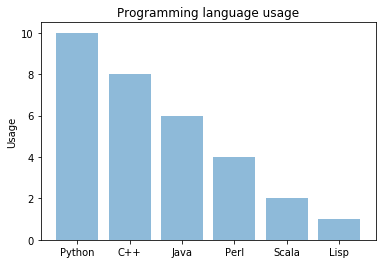

In [16]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [ ]:
topics_data = pd.DataFrame(topics_dict)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)

topics_data

In [ ]:
topics_data.to_csv('LCSSubmissionsData.csv', index=False) 
comments_data.to_csv('LCSCommentsData.csv', index=False)
